# Assignment 1 

## Question 1 

### Importing the libraries

In [1]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


### Reading the data from URL 

In [2]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
s=requests.get(url).content
col_str = "lettr capital letter, x-box horizontal position of box, y-box vertical position of box, width width of box, high height of box, onpix total # on pixels, x-bar mean x of on pixels in box, y-bar mean y of on pixels in box, x2bar mean x variance, y2bar mean y variance, xybar mean x y correlation, x2ybr mean of x * x * y, xy2br mean of x * y * y , x-ege mean edge count left to right, xegvy correlation of x-ege with y, y-ege mean edge count bottom to top, yegvx correlation of y-ege with x" 
col_names = col_str.split(',')

### Converting the data into dataframe and decoding it using utf-8

In [3]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')), header = None, names = col_names)

In [4]:
#just check the top 5 instances in dataframe df
df.head()

,lettr capital letter,x-box horizontal position of box,y-box vertical position of box,width width of box,high height of box,onpix total # on pixels,x-bar mean x of on pixels in box,y-bar mean y of on pixels in box,x2bar mean x variance,y2bar mean y variance,xybar mean x y correlation,x2ybr mean of x * x * y,xy2br mean of x * y * y,x-ege mean edge count left to right,xegvy correlation of x-ege with y,y-ege mean edge count bottom to top,yegvx correlation of y-ege with x
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## 1. Normalization Example 

#### Formula used :
##### Calculate the min and max value of that column and use the formula 
##### zi =  ( xi − min(x) ) / ( max(x)−min(x) )
#### By considering the maximum and minimum value in the column the values are normalized in the range of 0 - 1 , where max is assigned 1 and min is assigned 0

In [5]:
#Example for normalization 

data = {'score': [234,27,-74]} 
norm_example_df = pd.DataFrame(data)
normalized_example_df = norm_example_df[['score']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print norm_example_df
print "--- Normalized data ---"
print normalized_example_df

   score
0    234
1     27
2    -74
--- Normalized data ---
      score
0  1.000000
1  0.327922
2  0.000000


## 1.Normalize the column values 

In [6]:
normalized_df = df[col_names[1:]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalized_df["lettr capital letter"] = df["lettr capital letter"]
normalized_df.head()

,x-box horizontal position of box,y-box vertical position of box,width width of box,high height of box,onpix total # on pixels,x-bar mean x of on pixels in box,y-bar mean y of on pixels in box,x2bar mean x variance,y2bar mean y variance,xybar mean x y correlation,x2ybr mean of x * x * y,xy2br mean of x * y * y,x-ege mean edge count left to right,xegvy correlation of x-ege with y,y-ege mean edge count bottom to top,yegvx correlation of y-ege with x,lettr capital letter
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,T
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,I
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,D
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,N
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,G


## 2. Split the data into train - 12000 , validate & test as - 4000 samples

In [7]:
train, validate, test = np.split(normalized_df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [8]:
# Test the length of the values after splitting
print  "Train - " , len(train) , ", validate - " , len(validate) , ", test - " , len(test)

Train -  12000 , validate -  4000 , test -  4000


## 3. a) Generate decision trees

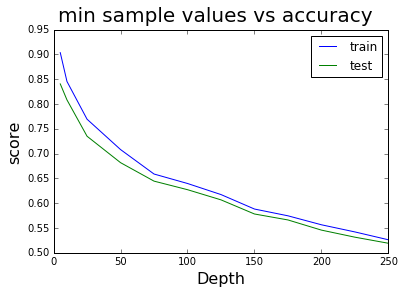

In [11]:
from sklearn import tree
from sklearn.metrics import accuracy_score

# create a list of min sample values 
min_sample_values = [250, 225, 200, 175, 150, 125, 100, 75, 50, 25, 10, 5 ]
train, validate, test = np.split(normalized_df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

x_graph = []
y_train_graph = []
y_validate_graph = []

for idx,i in enumerate(min_sample_values):
#     print ("----" , i , '----')
    # Initialize model
    tree_model = tree.DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf=i)
    # Train the model
    tree_model.fit(X = train[col_names[1:]], 
                   y = train["lettr capital letter"])
    
    # Predict the model - Train 
    y_predict = tree_model.predict(train[col_names[1:]])
    y_test = train["lettr capital letter"]
    scores1 = accuracy_score(y_test, y_predict)
#     print scores1
    x_graph.append(i)
    y_train_graph.append(scores1)
    
    y_predict = tree_model.predict(validate[col_names[1:]])
    y_test = validate["lettr capital letter"]
    scores2 = accuracy_score(y_test, y_predict) 
#     print scores2
    y_validate_graph.append(scores2)
    
#Display the graph using the min sample values and accuracy values
import matplotlib.pyplot as plt
plt.plot(x_graph, y_train_graph , label = "train")
plt.plot(x_graph,y_validate_graph , label = "test")
plt.suptitle('min sample values vs accuracy', fontsize=20)
plt.xlabel('Depth', fontsize=16)
plt.ylabel('score', fontsize=16)
plt.legend(loc="upper right")
plt.show()


## 3.b Best decision tree
After considering the constructed graph the accuracy values of the graph  - the minimum leaf node that has 5 instances has the highest accuracy. So that must be the best constructed model.

In [12]:
# create a dot file and save the tree in that format 
dotfile = open("tree_model1.dot", 'w')
tree.export_graphviz(tree_model, out_file = dotfile, feature_names = col_names[1:])
dotfile.close()
import pydot
(graph,) = pydot.graph_from_dot_file('tree_model1.dot')
graph.write_png('tree_model1.png')

True

In [13]:
#Credit : http://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

#Just taken this to convert tree to rules (condition ) as the tree image is huge in size
def tree_to_pseudo(tree, feature_names):

    '''
    Outputs a decision tree model as if/then pseudocode

    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {"
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print indent,"} else {"
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print indent,"}"
        else:
            print indent,"return " + str(value[node])

    recurse(left, right, threshold, features, 0)
    
tree_to_pseudo(tree_model,col_names[1:])

 if (  y-ege mean edge count bottom to top <= 0.166666671634 ) {
   if (  x-ege mean edge count left to right <= 0.166666671634 ) {
     if (  y-bar mean y of on pixels in box <= 0.566666722298 ) {
       if (  x2ybr mean of x * x * y <= 0.233333349228 ) {
         if (  y2bar mean y variance <= 0.233333349228 ) {
           return [[ 195.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]]
         } else {
           if (  xybar mean x y correlation <= 0.633333325386 ) {
             return [[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  283.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]]
           } else {
             if (  xybar mean x y correlation <= 0.700000047684 ) {
               return [[ 0.  0.  0.  3.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.]]
             }

## 3. d) Constructing the confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,152,0,0,3,0,0,2,0,2,0,...,0,6,0,0,0,0,0,1,2,0
1,0,119,0,4,1,0,0,1,1,1,...,3,6,2,0,0,5,0,2,0,0
2,0,0,110,0,2,0,6,0,1,1,...,2,0,1,0,2,0,0,0,1,0
3,3,4,0,124,2,1,4,6,0,0,...,1,1,1,1,1,0,0,1,1,1
4,0,3,1,0,122,1,4,1,0,0,...,0,1,8,0,2,0,0,4,0,3
5,0,1,3,2,1,134,1,1,2,1,...,0,0,2,2,0,1,3,0,3,1
6,1,2,6,2,2,3,128,4,0,0,...,5,0,2,0,0,1,0,2,0,0
7,0,7,0,5,1,0,2,129,0,0,...,1,2,2,0,0,1,1,0,0,1
8,0,2,0,0,0,1,0,0,145,3,...,0,1,2,0,0,0,0,2,0,1
9,2,2,0,3,1,5,0,1,5,135,...,1,0,2,1,0,0,0,0,0,2


In [15]:
## 3 e) Calculating the  precision_score, recall_score, f1_score

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#overall precision and recall score
print "Precision Score is" , precision_score(y_test, y_predict, average="weighted")
print "Recall_score is ", recall_score(y_test, y_predict, average="weighted") 
print "f1_score is ", f1_score(y_test, y_predict, average="weighted") 

Precision Score is 0.842138159568
Recall_score is  0.8405
f1_score is  0.840631809793


In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_predict)
#calculating individual precision, recall, fscore, support scores
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [ 0.92121212  0.71686747  0.85271318  0.775       0.80263158  0.8375
  0.75294118  0.75438596  0.87878788  0.92465753  0.77697842  0.86956522
  0.91549296  0.80555556  0.83703704  0.82        0.81528662  0.76190476
  0.79220779  0.9084507   0.92857143  0.89221557  0.87096774  0.86451613
  0.91891892  0.875     ]
recall: [ 0.88372093  0.80405405  0.86614173  0.7607362   0.77707006  0.81212121
  0.7804878   0.75        0.91772152  0.82317073  0.77142857  0.90909091
  0.91549296  0.86567164  0.75333333  0.81456954  0.8590604   0.82962963
  0.7672956   0.86        0.89655172  0.88690476  0.95744681  0.86451613
  0.83950617  0.9109589 ]
fscore: [ 0.90207715  0.75796178  0.859375    0.76780186  0.78964401  0.82461538
  0.76646707  0.75218659  0.89783282  0.87096774  0.77419355  0.88888889
  0.91549296  0.83453237  0.79298246  0.81727575  0.83660131  0.79432624
  0.77955272  0.88356164  0.9122807   0.88955224  0.91216216  0.86451613
  0.87741935  0.89261745]


## Question 4

### Reading the data from URL 
### Converting the data into dataframe and decoding it using utf-8

In [18]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

url="https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
s=requests.get(url).content
col_str = "Number of times pregnant , Plasma glucose concentration a 2 hours in an oral glucose tolerance test , Diastolic blood pressure (mm Hg), Triceps skin fold thickness (mm) , 2-Hour serum insulin (mu U/ml) , Body mass index (weight in kg/(height in m)^2) , Diabetes pedigree function , Age (years) , Class variable (0 or 1) "
col_names = col_str.split(',')
df2 = pd.read_csv(io.StringIO(s.decode('utf-8')), header = None, names = col_names)
df2.head()
train, validate, test = np.split(df2.sample(frac=1), [int(.6*len(df2)), int(.8*len(df2))])

[(1, 0.71490088858509915), (2, 0.73697881066302129), (3, 0.73957621326042378), (4, 0.73304853041695162), (5, 0.74089200273410805), (6, 0.73696172248803837), (7, 0.74222488038277523), (8, 0.7318010936431989), (9, 0.7318010936431989), (10, 0.73178400546821609), (11, 0.7318010936431989), (12, 0.73178400546821609), (13, 0.73048530416951463), (14, 0.72916951469583047), (15, 0.73178400546821609), (16, 0.73178400546821609), (17, 0.73178400546821598), (18, 0.73309979494190025), (19, 0.73176691729323307)]


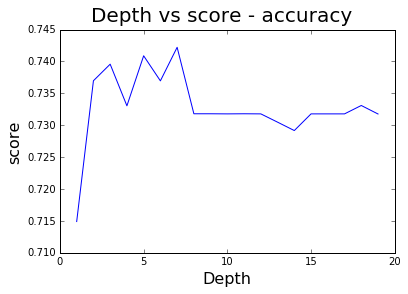

In [25]:
#train, validate, test = np.split(df2.sample(frac=1), [int(.6*len(df2)), int(.8*len(df2))])

x = df2[col_names[:-1]]
y = df2[col_names[-1]]
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold # import KFold


# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
x_v = []
y_v = []
kf = KFold(n_splits=10, shuffle = True)

for i in range(1,20):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i,min_samples_leaf=15)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=10, n_jobs=1)
    depth.append((i,scores.mean()))
    x_v.append(i)
    y_v.append(scores.mean())
print(depth)
 
v = [ {x[1] : x[0] } for x in depth ]

#Display the graph using the depth values along with the cross folds scores
import matplotlib.pyplot as plt
plt.plot(x_v, y_v)
plt.suptitle('Depth vs score - accuracy', fontsize=20)
plt.xlabel('Depth', fontsize=16)
plt.ylabel('score', fontsize=16)
plt.show()

## 4. a) Decision tree - Best fit calculation

In [20]:
# From the graph we infer that at depth 5, the model fits better.
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max(v).values()[0],min_samples_leaf=15)
clf.fit(X=df2[col_names[:-1]], y=df2[col_names[-1]])
y_predict = clf.predict(validate[col_names[:-1]])
y_test = validate[col_names[-1]]
from sklearn.metrics import accuracy_score
print "Decision tree model", clf
print "Accuracy value ", accuracy_score(y_test, y_predict)

Decision tree model DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy value  0.831168831169


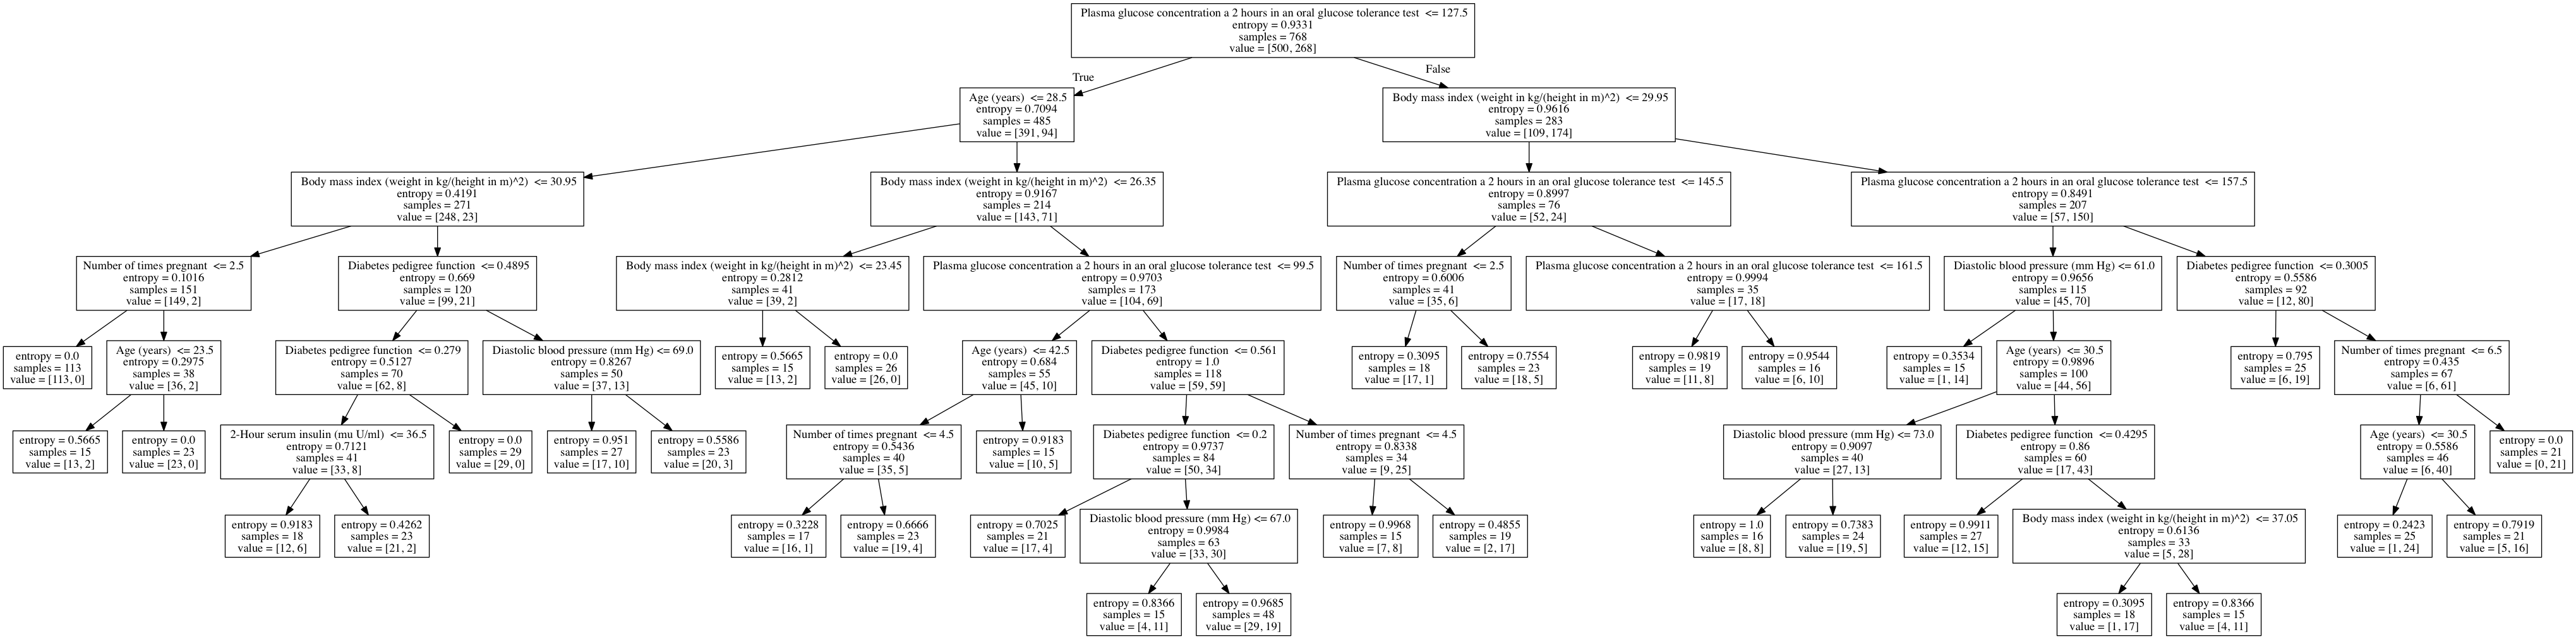

In [21]:
# create a dot file and save the tree in that format 
dotfile = open("tree_model2.dot", 'w')
tree.export_graphviz(clf, out_file = dotfile, feature_names = col_names[:-1])
dotfile.close()
import pydot
(graph,) = pydot.graph_from_dot_file('tree_model2.dot')
graph.write_png('tree_model2.png')
from IPython.display import Image
Image(filename='tree_model2.png')

### 4 b)  Calculating the confusion matrix, precision, recall score 

In [22]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
)

,0,1
0,88,4
1,22,40


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#overall precision and recall score
print(precision_score(y_test, y_predict, average="weighted"))
print(recall_score(y_test, y_predict, average="weighted"))

0.843919716647
0.831168831169
